In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [65]:
df = pd.read_csv('outputs/comebacks_v1.csv')
df = df[df['deficit']<=0]
df = df[df['game title'] != 'Oklahoma City Thunder at Dallas Mavericks']
print(len(df))

1215


Text(0.5, 0, 'Deficit')

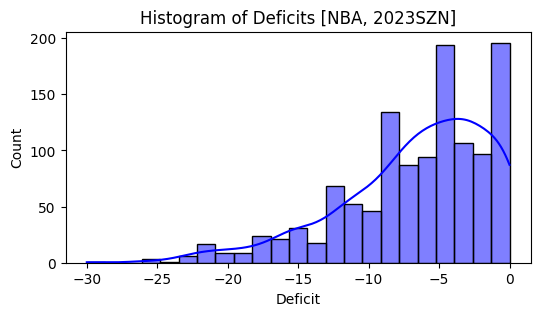

In [62]:
# Create a scatter plot using Seaborn
plt.figure(figsize=(6, 3))

sns.histplot(
    df['deficit'], 
    kde=True, 
    color='blue'
)

plt.title(f"Histogram of Deficits [NBA, 2023SZN]")
plt.xlabel("Deficit")

In [89]:
min_val = df['deficit'].min()
max_val = df['deficit'].max()
bins = np.arange(min_val, max_val + 5, 5)  # Creates bins with width 5

# Compute histogram
counts, bin_edges = np.histogram(df['deficit'], bins=bins)

# Create a DataFrame with bin ranges and counts
hist_table = pd.DataFrame({
    'Range': [f"[{bin_edges[i]:.1f}, {bin_edges[i+1]:.1f})" for i in range(len(bin_edges) - 1)],
    'Count': counts
})

hist_table['Percent'] = hist_table['Count'] / len(df) * 100
hist_table

,Range,Count,Percent
0,"[-30.0, -25.0)",3,0.246914
1,"[-25.0, -20.0)",25,2.057613
2,"[-20.0, -15.0)",63,5.185185
3,"[-15.0, -10.0)",169,13.909465
4,"[-10.0, -5.0)",361,29.711934
5,"[-5.0, 0.0)",594,48.888889


period
0      2
1    676
2    261
3    178
4     96
5      2
dtype: int64
period
0    0.001646
1    0.556379
2    0.214815
3    0.146502
4    0.079012
5    0.001646
dtype: float64


Text(0, 0.5, 'Count')

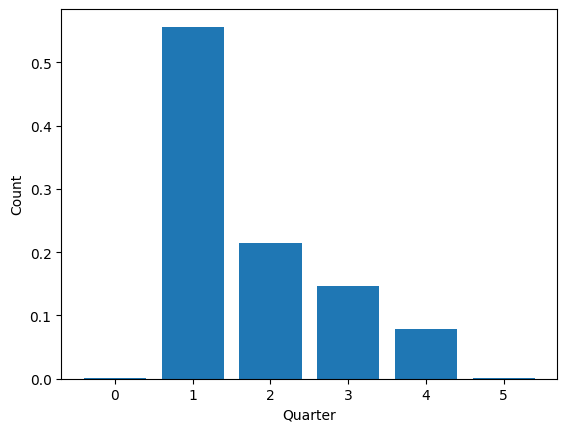

In [88]:
quarters = df.groupby('period').size()
quarter_pct = quarters/len(df)
print(quarters)
print(quarter_pct)

plt.bar(
    height=quarter_pct,
    x=np.arange(0,6)
)

# plt.bar_label(quarter_pct)

plt.xlabel("Quarter")
plt.ylabel("Count")

In [ ]:
# Fit quantile regression at 95% quantile with NO intercept
quantile = 0.005
model = sm.QuantReg(df['deficit'], df[['seconds_remaining']]).fit(q=quantile)  # No intercept term

# Get slope (forcing intercept to 0)
slope = model.params['seconds_remaining']
intercept = 0  # Manually setting intercept to zero

print(f"Equation of the line: y = {slope:.2f}x + {intercept:.2f}")

#TOOD: build a version of this quantile regression that follows the format of 
# x = (y-5)^2
# x = a(y-b)^2 where 'a' and 'b' are constants, need to find these values


Equation of the line: y = -0.02x + 0.00


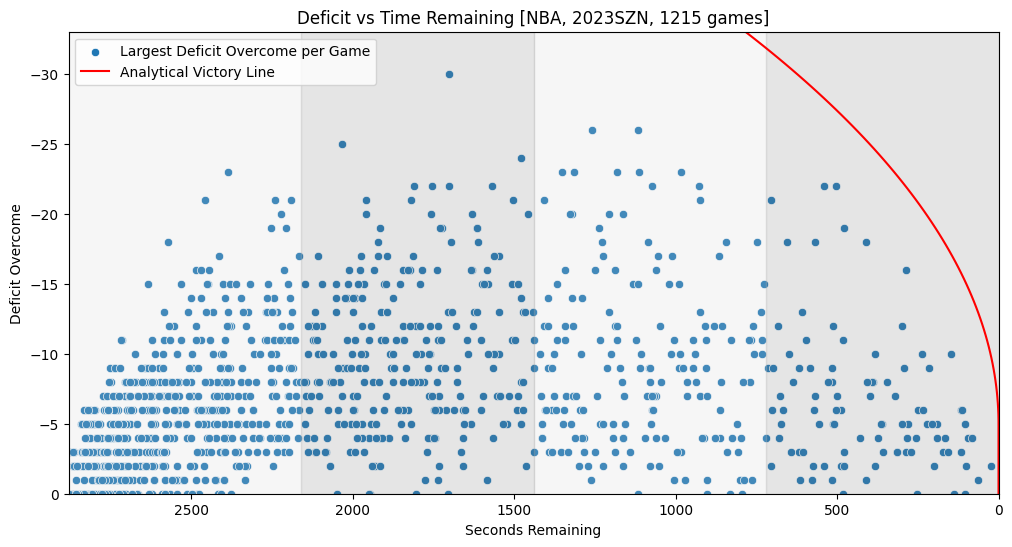

In [66]:
# Create a scatter plot using Seaborn
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='seconds_remaining', y='deficit', label='Largest Deficit Overcome per Game')

# Reverse the y-axis (negative numbers on top)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

# Customizing the plot
plt.title(f"Deficit vs Time Remaining [NBA, 2023SZN, {len(df)} games]")
plt.xlabel("Seconds Remaining")
plt.ylabel("Deficit Overcome")

# plot the function
y_values = np.linspace(-40, 0, 100)  # Generate 100 points for smooth line
x_values = np.where(y_values >= -5, 0, (y_values + 5) ** 2)

plt.plot(x_values, y_values, color='red', label='Analytical Victory Line')
# plt.plot(df['seconds_remaining'], slope * df['seconds_remaining'] + intercept, color='green', label=f"95% Quantile Line")

# plot gray boxes
plt.axvspan(0, 720, color="gray", alpha=0.2)
plt.axvspan(720, 1440, color="lightgray", alpha=0.2)
plt.axvspan(1440, 2160, color="gray", alpha=0.2)
plt.axvspan(2160, 2880, color="lightgray", alpha=0.2)

# limit x-axis to only 4 quarters
plt.xlim(2880, 0)
plt.ylim(0, min(df['deficit'])*1.1)
plt.legend()

# Save
plt.savefig("images/2023_NBA_v1", dpi=300)

# Show the plot
plt.show()

Equation of the line: y = 2.75x + 7.04


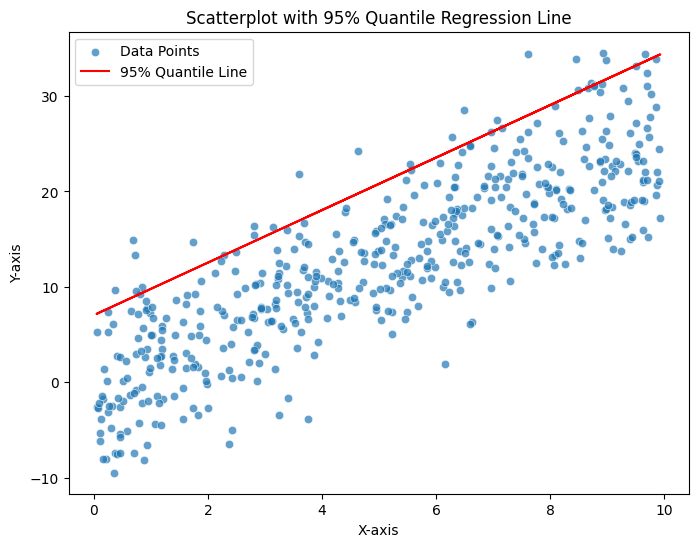

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Generate sample data
np.random.seed(42)
n = 500
x = np.random.rand(n) * 10
y = 2.5 * x + np.random.randn(n) * 5  # Some noisy linear data

df = pd.DataFrame({'x': x, 'y': y})

# Fit quantile regression at 95% quantile
X = sm.add_constant(df['x'])  # Add intercept term
quantile = 0.95
model = sm.QuantReg(df['y'], X).fit(q=quantile)

# Get slope and intercept
intercept, slope = model.params
print(f"Equation of the line: y = {slope:.2f}x + {intercept:.2f}")

# Plot scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['x'], y=df['y'], alpha=0.7, label="Data Points")
plt.plot(df['x'], slope * df['x'] + intercept, color='red', label=f"95% Quantile Line")

# Labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatterplot with 95% Quantile Regression Line")
plt.legend()
plt.show()
